# Monte Carlo Methods

## Introduction

In physics we are often interested in systems with large degrees of freedom, e.g.:

- many atoms in a chunk of matter,
- many electrons in an atom,
- the infinitely-many values of a quantum field at all points in a region of space-time.

The description of such systems often involves the evaluation of integrals of very high dimension. 

For example, imagine that we need to integrate atomic wave functions over the three coordinates of each of the 12 electrons in a magnesium atom. This amounts to 3x12=36 dimensions! 

If we use 64 points for each integration, this requires about $64^{36} \simeq 10^{65}$ evaluations of the integrand. If you had a very fast computer, capable of $10^6$ evaluations per second, this would take $10^{59}$ s, which is significantly longer than the age of the universe! ($\sim 10^{17}$ s). 

Direct quadrature is hopeless, if you still want to be alive when your integration is done! 

Monte Carlo methods provide a way to efficiently evaluating integrals of high dimension.

"Monte Carlo": arises from the random or "chance" character of the method, through the famous casino in Monaco. 

**Basic idea**: evaluate the integrand at a representative random sample of points. Analogous to predicting the results of an election on the basis of a poll of a small number of voters. 

It turns out that the Monte Carlo strategy is very appropriate for a broad class of problems in statistical and quantum mechanics.

## The Basic Monte Carlo Strategy 

Even though the real power of Monte Carlo methods (henceforth: MC) is in evaluating multi-dimensional integrals, it is easiest to illustrate the basic ideas in a one-dimensional situation.

Suppose we have to evaluate the integral:

$I = \int_0^1 f(x) \mathrm{d} x$.

In Chapter 4, we discussed several quadrature formulas that used values of $f$ at particular values of $x$, e.g. equally-spaced for the trapezium and Simpson's rule. 

An alternative way of evaluating the integral is to think of it as the average of $f$ over the interval $[0,1]$:

$I \approx \frac{1}{N} \sum_{i=1}^N f(x_i)$.

Here, the average of $f$ is evaluated by considering its values at $N$ points $x_i$, chosen at random, with equal probability anywhere within the interval $[0,1]$ (i.e. uniformly). 

To estimate the uncertainty associated with this formula, $\sigma_I$, consider $f_i \equiv f(x_i)$ as a random variable, and invoke the central limit theorem for large $N$. From the usual laws of statistics, we then have:

$\sigma_I^2 \approx \frac{1}{N} \sigma_f^2 = \frac{1}{N} \left[ \frac{1}{N} \sum_{i=1}^N f_i^2 - \left( \frac{1}{N} \sum_{i=1}^N f_i \right)^2 \right]$

where $\sigma_f^2$ is the "variance" in $f$, i.e. a measure of the extent to which $f$ deviates from its average value over the region of integration. 

Some important aspects of Monte Carlo integration are revealed by the above integration formula:

- The uncertainty in the estimate of the integral, $\sigma_I$, decreases as $1/\sqrt{N}$. If more points are used, we will get a more precise answer, although the error decreases very slowly with the number of points: you need to do four times more numerical work to halve the error in your answer!
- The trapezium rule error scales as $1/N^2$, therefore having a much greater accuracy for a given amount of numerical work. This advantage vasnishes in the multi-dimensional case, as we will see shortly.
- The precision is greater if $\sigma_f$ is smaller: i.e. if $f$ is as smooth as possible. One limit to consider is that when $f$ is constant, in which case we need its value only at one point to define its average. In the other limit, consider a situation in which $f$ is zero everywhere, except for a very narrow peak above some value of $x$. Then, if we pick $x_i$s with an equal probability in $[0,1]$, it is probable that all but a few of them will lie outside the peak of $f$, and this will lead to a poor estimate of $I$.

The method is extended to any interval $[a,b]$, by choosing random, uniform $x_i$s in $[a,b]$ and:

$I = \int_a^b f(x) \mathrm{d} x = \frac{b-a}{N} \sum_{i=1}^N f(x_i)$.

Let's begin our numerical Monte Carlo work by evaluating the integral:

$\int_0^1 \frac{ \mathrm{d} x } { 1 + x^2 } = \frac{\pi}{4}$.

Let's also calculate the error using the formula for $\sigma_I$. 

### Example 5.1: Use the Monte Carlo integration method to calculate the integral \int_0^1 \frac{ \mathrm{d} x } { 1 + x^2 } = \frac{\pi}{4}. Also calculate the error. 

In [1]:
import math
import random # we need random numbers for the Monte Carlo method!

random.seed(1234)

# Let's define a function that performs one-dimensional MC integration of an arbitrary for N points
# We'll also make it capable of performing the integration in an interval a,b
def mcint(func, a, b, N):
    sumi = 0
    sumisq = 0
    for i in range(N):
        xi = (b-a) * random.random() + a
        sumi = sumi + func(xi)
        sumisq = sumisq + func(xi)**2
    I = sumi * (b-a) / N
    sumisq = sumisq*(b-a)**2
    # sumisq *= (b-a)**2
    sigmaI = math.sqrt( (1/N) * ( (1/N) * sumisq - I**2 ) )

    return I, sigmaI # return the integral and its error

def fEX51(x):
    return 1/(1+x**2)

Iex51, err_ex51 = mcint(fEX51,0,1,100)
print('The estimate of the integral is=', Iex51, '+-', err_ex51)
print("Let's compare to the analytical value=", math.pi/4)

The estimate of the integral is= 0.8066530303708649 +- 0.016105612466499625
Let's compare to the analytical value= 0.7853981633974483


### Example 5.2: For the function of example 5.1, calculate the error as a function of the number of points N, from N=10 to N=10^4. Plot the the logarithm of the error versus the log of the number of points. Does it agree with our expectations?

Text(0, 0.5, '$\\log_{10}(\\epsilon)$')

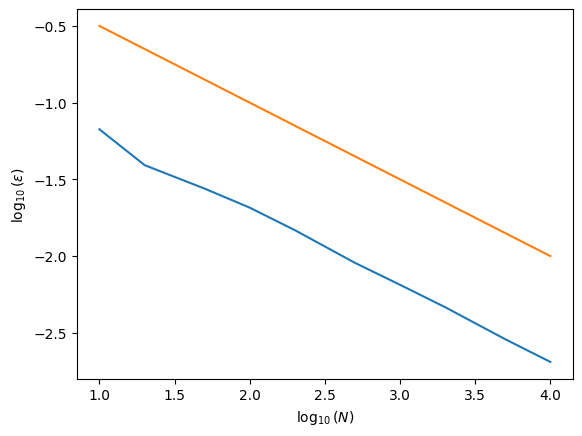

In [2]:
# The array of the number of points to integrate over:
Narray = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

Errs = []
for Ni in Narray:
    I, err = mcint(fEX51,0,1,Ni)
    Errs.append(err/I)

# Let's plot:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single set of axes.

# get the logs:
x = np.log10(Narray)
y = np.log10(Errs)
yexpect = np.log10(1/np.sqrt(Narray))

# plot: 
ax.plot(x, y) # make a one-dimensional plot using the above arrays
ax.plot(x, yexpect, label='theoretical') # make a one-dimensional plot using the above arrays

# labels:
ax.set_xlabel(r'$\log_{10}(N)$')
ax.set_ylabel(r'$\log_{10}(\epsilon)$')
    

### Variance Reduction

The uncertainty (squared) in a MC quadrature is proportional to the variance of the integrand: 

$\sigma_I^2 \approx \frac{1}{N} \sigma_f^2$, 

with the variance of the integrand: 

$\sigma_f^2 = \left[ \frac{1}{N} \sum_{i=1}^N f_i^2 - \left( \frac{1}{N} \sum_{i=1}^N f_i \right)^2 \right]$. 

Therefore, if we find a way of reducing the variance of the integrand, we will improve the efficiency of the method. One method is known as "importance sampling". 

Let's imagine multiplying and dividing the integrand by a positive weight function $w(x)$, normalized such that:

$\int_0^1 w(x) \mathrm{d} x = 1$.

The integral can then be written as:

$I = \int_0^1 w(x) \frac{f (x)} { w(x) } \mathrm{d} x$. 

We can then change variables from $x$ to: 

$y(x) = \int_0^x w(x') \mathrm{d}x'$.

This implies that:

$\frac{ \mathrm{d} y } { \mathrm{d} x } = w(x)$ and $y(x=0)=0$, $y(x=1)=1$.

and after the change of variables, the integral becomes:

$I = \int_0^1 \frac{ f(x(y)) } { w(x(y)) } \mathrm{d} y$.

The MC integration proceeds as usual, i.e. averaging the values of $f/w$ using random and uniform points $y$ over the interval $[0,1]$: 

$I \approx \frac{1}{N} \sum_{i=1}^N \frac{ f(x(y_i)) } { w(x(y_i)) }$. 

If we choose a $w$ function that behaves approximately as $f$, i.e. it is large where $f$ is large and small where $f$ is small, then the integrand $f/w$ can be made very smooth. 
This will result in a reduction in the variance of the MC estimate. 

This implies of course that we are able to find an appropriate $w$ and that we are able to invert $y(x) = \int_0^x w(x') \mathrm{d}x'$ to find $x(y)$. 

As an example, let's consider the same integral, $I = \int_0^1 \frac{\mathrm{d}x}{1+x^2}$. A good choice for a weight function is:

$w(x) = \frac{1}{3} (4 - 2 x)$. 

This is positive definite, decreases monotonically and is normalized correctly: $\int_0^1 w(x) \mathrm{d}x = 1$. It also approximates well the behavior of $f$: 

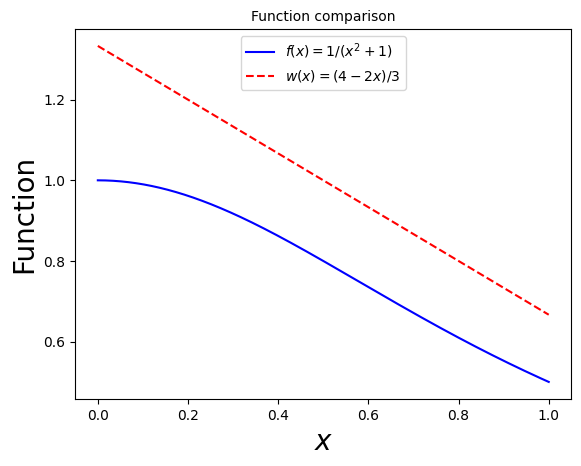

In [3]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# Now plot! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'Function', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'Function comparison', fontsize=10) # set the title 

# construct the x variable: 
x = np.linspace(0,1,1000)

# make a one-dimensional plot:
ax.plot(x, 1/(1+np.power(x,2)), label=r'$f(x) = 1/(x^2 + 1)$', ls='-', color='blue') 

# check if this agrees with a line with slope -1/2 (on the log-log plot):
ax.plot(x, (4 - 2 * x)/3, label=r'$w(x) = (4-2x)/3$', ls='--', color='red')

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here


The new integration variable is:

$y = \int_0^x w(x') \mathrm{d} x' = \frac{1}{3} x(4-x)$. 

And this can be inverted to give:

$x = 2 - (4 - 3y)^{1/2}$.

Let's see this change of variables in action! 

### Example 5.3: Use the Monte Carlo integration method with the variance reduction to calculate the integral \int_0^1 \frac{ \mathrm{d} x } { 1 + x^2 } over the same number of points as in Example 5.2. Make a plot comparing to the error calculated in Example 5.2. 

In [4]:
# Start by modifying the mcint function to accept the x(y) and w(x) functions as input
import math
import random # we need random numbers for the Monte Carlo method!



## Multi-Dimensional Monte Carlo Integration

The one-dimensional discussion above can be readily generalized to $d$-dimensional integrals of the form:

$I = \int \mathrm{d}^d x f(\vec{x})$.

MC integration proceeds as it did in the one-dimensional case:

$I \approx \frac{1}{N} \sum_{i=1}^N f(\vec{x}_i)$,

where the components of the vector $\vec{x}_i$ are chosen independently. 

Let's use this method to calculate $\pi$ via:

$\pi = 4 \int_0^1 \mathrm{d} y \int_0^1 \mathrm{d} x \theta(1 - x^2 - y^2)$,

i.e. by comparing the area of a quadrant of the unit circle, to that of the unit square. 

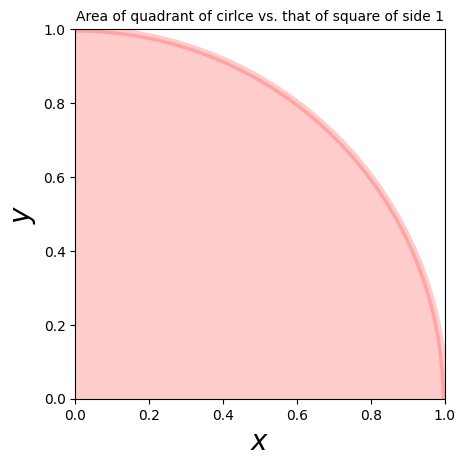

In [5]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# Now plot! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$y$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'Area of quadrant of cirlce vs. that of square of side 1', fontsize=10) # set the title 

# plot the circle
circle1 = plt.Circle((0, 0), 1, color='r', alpha=0.2, ec='r', lw=5)
ax.add_patch(circle1)

# set the aspect ratio of the axes to 1:
ax.set_aspect(1)

plt.show() # show the plot here


### Example 5.4: Use multi-dimensional Monte Carlo integration to calculate π!

100%|█████████████████████████████████████████| 100000000/100000000 [01:07<00:00, 1483675.12it/s]

Our approximation for pi= 3.141513 with error= 0.000164223873746511
Compare to the analytic value 3.141592653589793


We can also use variance reduction in many dimensions. For a weight function $w(\vec{x})$ normalized so that its integral over the region is unity, the new variable is a vector $\vec{y}$, where the *Jacobian* is:

$\left| \frac{\partial \vec{y}}{\partial \vec{x}}\right| = w(\vec{x})$.

It's generally very difficult to construct $\vec{x}(\vec{y})$ explicitly. We will discuss methods to do this below. 

Going back to our MC integration results, although the results were satisfactory in our examples, MC integration does not appear to be particularly efficient, especially in comparison to the other quadrature methods that we previously discussed. 

However, consider evaluating a multi-dimensional integral, such as the one used for the calculation of $\pi$. 

Suppose that we are willing to invest a given amount of numerical work, e.g. to evaluate the integrand exactly $N$ times, and we wish to compare the efficiencies of various quadrature methods. 

For the trapezoid rule, for example, if there are a total of $N$ points, then each dimension of a $d$-dimensional integral is broken up into $\sim N^{1/d}$ intervals, of spacing $h\sim N^{-1/d}$. It turns out that the total error would be:

$\epsilon_\mathrm{trapezoid} \sim \mathcal{O}(1/N^{2/d})$.

For large $d$, this decreases very slowly with increasing $N$. For example, for $d=4$, it decreases as $\sim \mathcal{O}(1/N^{1/2})$. 

On the other hand, the uncertainty of Monte Carlo quadrature always decreases as $\sim 1/\sqrt{N}$, *independent* of the number of dimensions $d$!

Therefore, we would expect that the MC method is more efficient than the trapezoid method when $d\simeq 4$. 

## von Neumann Rejection Sampling ("Hit-or-Miss") 

During our integration of $I = \int_0^1 \frac{1}{1+x^2} \mathrm{d} x$, if we had wanted to use the weight function:

$w(x) = \frac{6}{5} (1 - \frac{1}{2} x^2)$, 

then we would have been faced with solving a cubic equation to find $x(y)$. While this is certainly possible, choices of the weight that might follow $f$ more generally will lead to more complicated functions that cannot be inverted analytically.

However, it is possible to do this numerically. A convenient method for generating one- or multi-dimensional random variables is the von Neumann rejection:

Suppose we are interested in generating $x$ in $[0,1]$ with distribution $w(x)$, and that $w'(x)$ is a positive function such that $w'(x) > w(x)$ over the region of integration (Note that this is not the derivative). A convenient choice (but not always useful) for $w'$ is any constant greater than (or equal to) the maximum value of $w$ in the region of integration. 

If we generate points in two dimensions that uniformly fill the area under the curve $w'(x)$ and then "accept" for use only those points that are under $w(x)$, then the accepted points will be distributed according to $w(x)$. 

Practically: 
- Choose $x_i$ distributed proportional to $w'$,
- Choose a random number $\eta$ uniformly in $[0,1]$.
- $x_i$ is then accepted if $\eta < w(x_i)/w'(x_i)$.
- if a point is rejected, we simply go on and try another $x_i$.

This technique is clearly efficient only if $w'$ is close to $w$ throughout the entire range of integration, otherwise too much time is wasted rejecting "useless" points. 

### Example 5.5: Use von Neumann rejection to sample points in the interval [0,1], distributed as w(x) = \frac{6}{5} ( 1 - \frac{1}{2} x^2). Plot a histogram of the points and verify that they are indeed distributed according to w(x). Evaluate the integral I = \int_0^1 \frac{1}{1+x^2} \mathrm{d} x and its uncertainty with these points. 

### An Introduction to Monte Carlo Simulations

A Monte Carlo simulation contains the following ingredients:

- A probability density function that characterizes the system that we wish to simulate,
- Random numbers,
- A sampling rule,
- An error estimation.

The von Neumann rejection method of sampling provides a simple way to generate "simulations", i.e. samples of "events" that are distributed according to a certain probability density function, and look "realistic". 

Let's examine an example in one dimension!

### Example 5.5: Due to the uncertainty principle, the mass, m of an unstable particle (which can be measured through the momenta of its decay products), is distributed according to the Breit-Wigner distribution (in natural units):

$f(m) = \frac{k}{ (m^2 - M^2)^2 + \Gamma^2 M^2 }$,

where $k$ is a normalization constant, $M$ is the particle's "nominal" mass and, $\Gamma = 1/\tau$ is its width, defined as the inverse of its lifetime, $\tau$. 

Our goal is to generate $N$ decays of the particle in its rest frame, distributed according to the Breit-Wigner distribution.

We can assume that the particle is a top quark, with nominal mass $M = 172.7$ GeV and width $\Gamma = 1.4$ GeV. 

We can use the von Neumann rejection method. To do so, we need to find a constant which is larger than $f(m)$ everywhere. We can start by choosing $f_\mathrm{max}= \frac{k}{ \Gamma^2 M^2 }$. 

In [6]:
import random
import numpy as np
import math

# first let's define our distribution: 
def fBW(m,M,Gam):
    """Calculate the Breit-Wigner distribution"""
    k = 1 # set the normalization constant to 1
    return k / (( m**2 - M**2)**2 + Gam**2 * M**2 )

# and perform the von Neumann rejection:
N = 1000 # we will generate N decay "events"
n = 0 # n will be the counter of generated "events"
# set the properties of the particle:
M = 172.7
Gam = 14
# let's also set a minimum and maximum mass (in GeV) 
mmax = 200 
mmin = 150
# and save the generated masses in an array:
masses = []
while n < N:
    m = random.random()*(mmax-mmin) + mmin  
    r = random.random()
    if r < fBW(m,M,Gam) / (1/Gam**2/M**2):
        n = n + 1
        masses.append(m)
    else:
        pass    


In [7]:
# Let's plot a histogram of the masses!

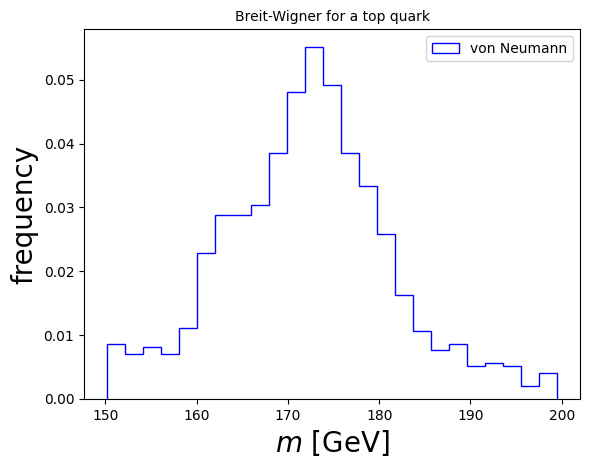

In [8]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$m$ [GeV]', fontsize=20) # set the x label
ax.set_ylabel(r'frequency', fontsize=20) # set the y label
ax.set_title('Breit-Wigner for a top quark', fontsize=10) # set the title 

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
ax.hist(masses, color='blue', bins=25, density=True, fill=False, histtype='step', label="von Neumann") 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

In this case, we can perform a change of variables to obtain an efficiency of 100%:

$m^2 = M\Gamma \tan\eta + M^2$. 

and with this:

$\frac{ \mathrm{d} m^2 }{ \mathrm{d} \eta} = M\Gamma \sec^2 \eta$, which turns the Breit-Wigner distribution flat, e.g., under the integral:

$I = \int_{m_\mathrm{min}}^{m_\mathrm{max}} \mathrm{d} m^2 \frac{k}{ (m^2 - M^2)^2 + \Gamma^2 M^2 }$,

which turns into: 

$I = \int_{m_\mathrm{min}}^{m_\mathrm{max}} \mathrm{d} \eta \left|\frac{ \mathrm{d} m^2 }{ \mathrm{d} \eta}\right|  \frac{k}{ (m^2 - M^2)^2 + \Gamma^2 M^2 } = \int_{\eta_\mathrm{min}}^{\eta_\mathrm{max}} \frac{k}{\Gamma M} \mathrm{d} \rho$.


### Example 5.6: Generate events distributed according to a Gaussian distribution:

$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp(- (x-\mu)^2 / (2\sigma^2))$

Plot the results in a histogram. 

In [9]:
import random
import numpy as np
import math

# first let's define our distribution: 
def Gaussian(x,mu,sigma):
    """Calculate the Gaussan distribution"""
    return 1/sigma/np.sqrt(2 * math.pi) * np.exp( - (x - mu)**2 / (2 * sigma**2))

# and perform the von Neumann rejection:
N = 10000 # we will generate N poits
n = 0 # n will be the counter of generated "events"
# set the properties of the particle:
mu = 0
sigma = 1
# let's also set a minimum and maximum mass (in GeV) 
xmin = -10
xmax = 10
# and save the generated masses in an array:
x = []
while n < N:
    xi = random.random()*(xmax-xmin) + xmin  
    r = random.random()
    if r < Gaussian(xi,mu,sigma)/ Gaussian(mu,mu,sigma):
        n = n + 1
        x.append(xi)
    else:
        pass    


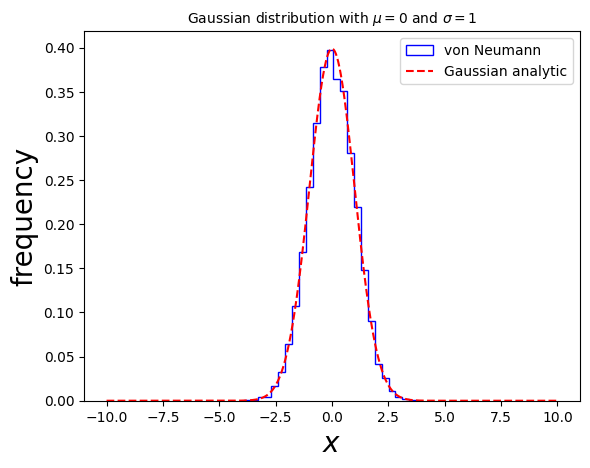

In [10]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'frequency', fontsize=20) # set the y label
ax.set_title(r'Gaussian distribution with $\mu=' + str(mu) + r'$ and $\sigma=' + str(sigma) + '$', fontsize=10) # set the title 

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
ax.hist(x, color='blue', bins=25, density=True, fill=False, histtype='step', label="von Neumann") 

# plot the distribution itself:
xv = np.linspace(xmin, xmax,1000)
gaussianpoints = Gaussian(xv,mu,sigma)

ax.plot(xv, gaussianpoints, ls='--', color='red', label='Gaussian analytic')

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here